# TemporalVAE training on hEmbryo8 datasets

Integrating human Embryo 8 datasets: Z_C_Xiao_M_P_Liu_Tyser_Xiang

**Note**, use of the TemporalVAE by install it (from GitHub) or load from its path

* Install via terminal (recommended)
  ```bash
  pip install -U git+https://github.com/StatBiomed/TemporalVAE
  ```
* Load path via Python
  ```python
  import sys
  sys.path.append('../')
  ```

In [1]:
import os
import yaml
import logging
import numpy as np
import pandas as pd
from collections import Counter

from TemporalVAE.utils import LogHelper
from TemporalVAE.utils.utils_project import *

### Load data from Zenodo
Data will be downloaded for the first time

In [2]:
from TemporalVAE import datasets

adata_hEmbryo8 = datasets.hEmbryo8(show_datadir=True)
adata_hEmbryo8

/ssd/users/yuanhua/MyGit/TemporalVAE-release/examples/data/rawCount_Z_C_Xiao_M_P_Liu_Tyser_Xiang.filtered.h5ad


AnnData object with n_obs × n_vars = 25003 × 1692
    obs: 'time', 'day', 'dataset_label', 'donor', 'cell_type', 'title', 'species', 'n_genes', 'tvae_predicted_time'
    var: 'n_cells'
    obsm: 'X_umap', 'tvae_emb'
    layers: 'processed'

In [3]:
datasets.hEmbryo8?

Signature: datasets.hEmbryo8(show_datadir=False) -> anndata._core.anndata.AnnData
Docstring:
Human embryos during peri-implantation.

This dataset contains the processed read counts by integrating 8 studies, 
and the inference outputs from TemporalVAE.
Data available on Zenodo (ref: 15366361, h5ad file_) 

.. _file: https://zenodo.org/records/15366361/files/rawCount_Z_C_Xiao_M_P_Liu_Tyser_Xiang.filtered.h5ad

.. note::
   This downloads 448 MB of data upon the first call of the function and 
   stores it in :attr:
   `~TemporalVAE.settings.datasetdir`\ `/hEmbryos8studies_TVAEpost.h5ad`.

Returns
-------
Annotated data matrix.

Examples
--------
>>> import TemporalVAE as tvae
>>> tvae.datasets.hEmbryos8studies_TVAEpost()
AnnData object with n_obs × n_vars = 25003 × 1692
    obs: 'time', 'day', 'dataset_label', 'donor', 'cell_type', 'title', 
        'species', 'n_genes', 'tvae_predicted_time'
    var: 'n_cells'
    obsm: 'X_umap', 'tvae_emb'
    layers: 'processed'
File:      /ssd/users

### Transform data

In [4]:
sc_expression_df_use = pd.DataFrame(
    data = adata_hEmbryo8.layers['processed'],
    index = adata_hEmbryo8.obs.index,
    columns = adata_hEmbryo8.var.index,
)
cell_time_use = adata_hEmbryo8.obs.copy()

In [5]:
cell_time_use

,time,day,dataset_label,donor,cell_type,title,species,n_genes,tvae_predicted_time
CS7_315,17.5,D17.5_cui,C,D17.5_cui,Connecting stalk,CS7_315,human,220,16.402642
CS7_317,17.5,D17.5_cui,C,D17.5_cui,Connecting stalk,CS7_317,human,239,15.611453
CS7_318,17.5,D17.5_cui,C,D17.5_cui,Connecting stalk,CS7_318,human,220,15.145197
CS7_320,17.5,D17.5_cui,C,D17.5_cui,Connecting stalk,CS7_320,human,230,14.401964
CS7_324,17.5,D17.5_cui,C,D17.5_cui,Connecting stalk,CS7_324,human,202,15.687727
...,...,...,...,...,...,...,...,...,...
D14_3S16,14.0,D14_xiang19,Xiang,D14_xiang19,Epiblast,Embryo_D14_3S16,human,537,8.372269
D14_3S9,14.0,D14_xiang19,Xiang,D14_xiang19,Cytotrophoblast,Embryo_D14_3S9,human,477,9.658588
D14_2S2,14.0,D14_xiang19,Xiang,D14_xiang19,Syncytiotrophoblast,Embryo_D14_2S2,human,688,10.708826
D14_2B1,14.0,D14_xiang19,Xiang,D14_xiang19,Extravillous Cytotrophoblast,Embryo_D14_2B1,human,687,14.149964


In [6]:
sc_expression_df_use

,A1CF,A2M,AADAT,AAMDC,ABAT,ABCA6,ABCA9,ABCC11,ABCC12,ABCC3,...,ZNF831,ZNF835,ZNF836,ZNF853,ZP2,ZP3,ZSCAN10,ZSCAN4,ZSCAN5B,ZSWIM6
CS7_315,-0.25046,-0.424747,-0.624729,-0.643412,-0.297956,-0.092616,-0.097029,-0.106771,-0.101266,-0.211040,...,-0.046615,-0.211003,-0.462714,-0.133877,-0.147834,-0.289095,-0.345521,-0.232680,-0.133963,-0.316463
CS7_317,-0.25046,-0.424747,-0.624729,-0.643412,-0.297956,-0.092616,-0.097029,-0.106771,-0.101266,-0.211040,...,-0.046615,-0.211003,-0.462714,-0.133877,-0.147834,-0.289095,3.137863,-0.232680,-0.133963,-0.316463
CS7_318,-0.25046,-0.424747,-0.624729,-0.643412,-0.297956,-0.092616,-0.097029,-0.106771,-0.101266,-0.211040,...,-0.046615,-0.211003,-0.462714,-0.133877,-0.147834,-0.289095,-0.345521,-0.232680,-0.133963,-0.316463
CS7_320,-0.25046,-0.424747,-0.624729,-0.643412,-0.297956,-0.092616,-0.097029,-0.106771,-0.101266,-0.211040,...,-0.046615,-0.211003,-0.462714,-0.133877,-0.147834,-0.289095,-0.345521,-0.232680,-0.133963,-0.316463
CS7_324,-0.25046,-0.424747,-0.624729,-0.643412,-0.297956,-0.092616,-0.097029,-0.106771,-0.101266,-0.211040,...,-0.046615,-0.211003,-0.462714,-0.133877,-0.147834,-0.289095,-0.345521,-0.232680,-0.133963,-0.316463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D14_3S16,-0.25046,-0.424747,0.937927,-0.643412,-0.297956,-0.092616,-0.097029,-0.106771,-0.101266,-0.211040,...,-0.046615,3.993124,2.209510,-0.133877,-0.147834,-0.289095,0.714889,-0.232680,-0.133963,-0.316463
D14_3S9,-0.25046,-0.424747,-0.323694,-0.643412,-0.297956,-0.092616,-0.097029,-0.106771,-0.101266,1.618832,...,-0.046615,-0.211003,-0.462714,-0.133877,-0.147834,-0.289095,-0.345521,-0.232680,-0.133963,-0.316463
D14_2S2,-0.25046,-0.129684,1.249341,-0.643412,-0.297956,1.199675,-0.097029,-0.106771,-0.101266,-0.211040,...,-0.046615,0.664114,0.889969,-0.133877,-0.147834,-0.289095,-0.345521,0.459306,-0.133963,-0.316463
D14_2B1,-0.25046,-0.424747,1.132616,0.197443,-0.297956,-0.092616,-0.097029,-0.106771,-0.101266,-0.211040,...,-0.046615,-0.211003,-0.462714,-0.133877,-0.147834,-0.289095,-0.345521,-0.232680,-0.133963,-0.316463


### Set necessary parameters for dataset preprocessing and model training

In [7]:
# result_save_path="results/Fig4_TemporalVAE_kFoldOn_humanEmbryo_xiang2019_250713/"
# data_path="/human_embryo_preimplantation/integration_8dataset/"
# time_standard_type="embryoneg5to5"

result_save_path = "data/"
data_golbal_path = "data/"
data_path=""
min_gene_num=50
min_cell_num=50
train_epoch_num=50
batch_size=100000
time_standard_type="embryoneg1to1"
vae_param_file="supervise_vae_regressionclfdecoder_mouse_stereo"

vae_param_file

'supervise_vae_regressionclfdecoder_mouse_stereo'

 ### import vae model parameters from yaml file

In [8]:
with open(f"../vae_model_configs/{vae_param_file}.yaml", 'r') as file:
    try:
        config = yaml.safe_load(file)
    except yaml.YAMLError as exc:
        print(exc)

### set logger and parameters, creat result save path and folder

In [9]:
latent_dim = config['model_params']['latent_dim']
_path = '{}/{}/'.format(result_save_path, data_path)
if not os.path.exists(_path):
    os.makedirs(_path)
_path

'data///'

In [10]:
logger_file = '{}/{}_dim{}_time{}_epoch{}_minGeneNum{}.log'.format(
    _path, vae_param_file, latent_dim,
    time_standard_type, train_epoch_num,
    min_gene_num
)

LogHelper.setup(log_path=logger_file, level='INFO')
_logger = logging.getLogger(__name__)
_logger.info("Finished setting up the logger at: {}.".format(logger_file))
_logger.info("Train on dataset: {}.".format(data_golbal_path + data_path))

_logger.info("load vae model parameters from file: {}".format(vae_param_file + ".yaml"))

2025-07-27 23:25:48,322 INFO - __main__ - Finished setting up the logger at: data////supervise_vae_regressionclfdecoder_mouse_stereo_dim50_timeembryoneg1to1_epoch50_minGeneNum50.log. 
2025-07-27 23:25:48,348 INFO - __main__ - Train on dataset: data/. 
2025-07-27 23:25:48,349 INFO - __main__ - load vae model parameters from file: supervise_vae_regressionclfdecoder_mouse_stereo.yaml 


### Set donor list and dictionary

In [11]:
donor_list = np.unique(adata_hEmbryo8.obs["dataset_label"])
donor_list = sorted(donor_list, key=Embryodonor_resort_key)
donor_dic = dict()
for i in range(len(donor_list)):
    donor_dic[donor_list[i]] = i
batch_dic = donor_dic.copy()

_logger.info("Consider donor as batch effect, donor use label: {}".format(donor_dic))
_logger.info("For each donor (donor_id, cell_num):{} ".format(Counter(cell_time_use["day"])))

save_file_name = f"{_logger.root.handlers[0].baseFilename.replace('.log', '')}/"

2025-07-27 23:25:48,380 INFO - __main__ - Consider donor as batch effect, donor use label: {'C': 0, 'L': 1, 'M': 2, 'P': 3, 'T': 4, 'Xiang': 5, 'Xiao': 6, 'Z': 7} 
2025-07-27 23:25:48,384 INFO - __main__ - For each donor (donor_id, cell_num):Counter({'D17.5_cui': 5082, 'D18.5_xiao': 4938, 'D9_m': 3188, 'D8_z': 2077, 'D10_z': 1710, 'D11_m': 1616, 'D_14_21_t': 1195, 'D12_z': 854, 'D6_z': 733, 'D14_z': 537, 'D6_7_l': 529, 'D7_p': 466, 'D6_p': 415, 'D5_p': 377, 'D7_8_l': 355, 'D4_p': 190, 'D14_xiang19': 135, 'D5_6_l': 105, 'D12_xiang19': 88, 'D3_p': 81, 'D10_xiang19': 77, 'D9_xiang19': 68, 'D7_xiang19': 65, 'D6_xiang19': 63, 'D8_xiang19': 59})  


In [12]:
batch_dic

{'C': 0, 'L': 1, 'M': 2, 'P': 3, 'T': 4, 'Xiang': 5, 'Xiao': 6, 'Z': 7}

## 1. If you want to do train on all donors and check the umap of latent space.

/ssd/users/yuanhua/envs/TemporalVAE-V1.0/lib/python3.10/site-packages/lightning_fabric/__init__.py:36: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  __import__("pkg_resources").declare_namespace(__name__)
2025-07-27 23:25:50,262 INFO - TemporalVAE.utils.utils_project - Set x_sc_train data with shape (gene, cells): torch.Size([1692, 25003]) 
2025-07-27 23:25:50,368 INFO - TemporalVAE.utils.utils_project - label dictionary: {300: -1.0, 400: -0.871, 500: -0.742, 550: -0.677, 600: -0.613, 650: -0.548, 700: -0.484, 750: -0.419, 800: -0.355, 900: -0.226, 1000: -0.097, 1100: 0.032, 1200: 0.161, 1400: 0.419, 1750: 0.871, 1850: 1.0} 
2025-07-27 23:25:50,370 INFO - TemporalVAE.utils.utils_project - Normalize train y_time_train type: embryoneg1to1, with y_time_train lable: [ 300.  400.  500.  550.  600

Free Memory Percentage: 93.52%
[INFO] GPU device 7 - total: 24.0GB; - memory free: 23.68GB.
[INFO] GPU device 6 - total: 24.0GB; - memory free: 22.394GB.
[INFO] GPU device 5 - total: 24.0GB; - memory free: 18.705GB.
[INFO] GPU device 4 - total: 24.0GB; - memory free: 23.154GB.
[INFO] GPU device 3 - total: 24.0GB; - memory free: 23.68GB.
[INFO] GPU device 2 - total: 24.0GB; - memory free: 23.68GB.
[INFO] GPU device 1 - total: 24.0GB; - memory free: 23.68GB.
[INFO] GPU device 0 - total: 24.0GB; - memory free: 23.68GB.

[INFO] more than 5% free memory, Auto select GPU device 7,- memory free: 23.68GB
======= Training SuperviseVanillaVAE_regressionClfDecoder_mouse_noAdversarial =======


2025-07-27 23:25:51,232 INFO - pytorch_lightning.accelerators.cuda - LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7] 
2025-07-27 23:25:51,236 INFO - pytorch_lightning.callbacks.model_summary - 
  | Name  | Type                                                         | Params
---------------------------------------------------------------------------------------
0 | model | SuperviseVanillaVAE_regressionClfDecoder_mouse_noAdversarial | 9.6 M 
---------------------------------------------------------------------------------------
9.6 M     Trainable params
0         Non-trainable params
9.6 M     Total params
38.315    Total estimated model params size (MB) 
/ssd/users/yuanhua/envs/TemporalVAE-V1.0/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:432: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 256 which is the numbe

Epoch 0: 100%|█| 1/1 [00:00<00:00,  1.02it/s, v_num=5, train_loss_step=2.200, train_Reconstruction_loss_step=1.390, train_KLD_step=-6.75, train_clf_loss_step=0.813, train_loss_epochEpoch train loss: {'train_loss_step': tensor(2.2005, device='cuda:7'), 'train_Reconstruction_loss_step': tensor(1.3860, device='cuda:7'), 'train_KLD_step': tensor(-6.7525, device='cuda:7'), 'train_clf_loss_step': tensor(0.8128, device='cuda:7'), 'train_loss_epoch': tensor(2.2005, device='cuda:7'), 'train_Reconstruction_loss_epoch': tensor(1.3860, device='cuda:7'), 'train_KLD_epoch': tensor(-6.7525, device='cuda:7'), 'train_clf_loss_epoch': tensor(0.8128, device='cuda:7')}
Epoch 1: 100%|█| 1/1 [00:00<00:00,  1.61it/s, v_num=5, train_loss_step=2.030, train_Reconstruction_loss_step=1.320, train_KLD_step=-7.26, train_clf_loss_step=0.701, train_loss_epochEpoch train loss: {'train_loss_step': tensor(2.0278, device='cuda:7'), 'train_Reconstruction_loss_step': tensor(1.3249, device='cuda:7'), 'train_KLD_step': tenso

2025-07-27 23:27:06,116 INFO - pytorch_lightning.utilities.rank_zero - `Trainer.fit` stopped: `max_epochs=50` reached. 


Epoch 49: 100%|█| 1/1 [00:01<00:00,  1.90s/it, v_num=5, train_loss_step=0.928, train_Reconstruction_loss_step=0.836, train_KLD_step=-34.9, train_clf_loss_step=0.0837, train_loss_epo

2025-07-27 23:27:06,263 INFO - pytorch_lightning.utilities.rank_zero - You are using a CUDA device ('NVIDIA GeForce RTX 3090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision 
2025-07-27 23:27:06,304 INFO - pytorch_lightning.accelerators.cuda - LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7] 
/ssd/users/yuanhua/envs/TemporalVAE-V1.0/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:432: PossibleUserWarning: The dataloader, predict_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 256 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(



Predicting DataLoader 0: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.34it/s]


2025-07-27 23:27:06,861 INFO - TemporalVAE.utils.utils_project - Plot training loss line for check. 
2025-07-27 23:27:06,887 INFO - tensorboard - No path found after /ssd/users/yuanhua/MyGit/TemporalVAE-release/examples/data/supervise_vae_regressionclfdecoder_mouse_stereo_dim50_timeembryoneg1to1_epoch50_minGeneNum50/wholeData/SuperviseVanillaVAE_regressionClfDecoder_mouse_noAdversarial/version_5/events.out.tfevents.1753676751.woody.3048840.0 
2025-07-27 23:27:06,888 INFO - TemporalVAE.utils.utils_project - All tags in logger: ['lr-Adam', 'train_loss_step', 'train_Reconstruction_loss_step', 'train_KLD_step', 'train_clf_loss_step', 'epoch', 'train_loss_epoch', 'train_Reconstruction_loss_epoch', 'train_KLD_epoch', 'train_clf_loss_epoch'] 
2025-07-27 23:27:06,889 INFO - TemporalVAE.utils.utils_plot - plot training process. 
2025-07-27 23:27:06,905 INFO - tensorboard - No path found after /ssd/users/yuanhua/MyGit/TemporalVAE-release/examples/data/supervise_vae_regressionclfdecoder_mouse_ste

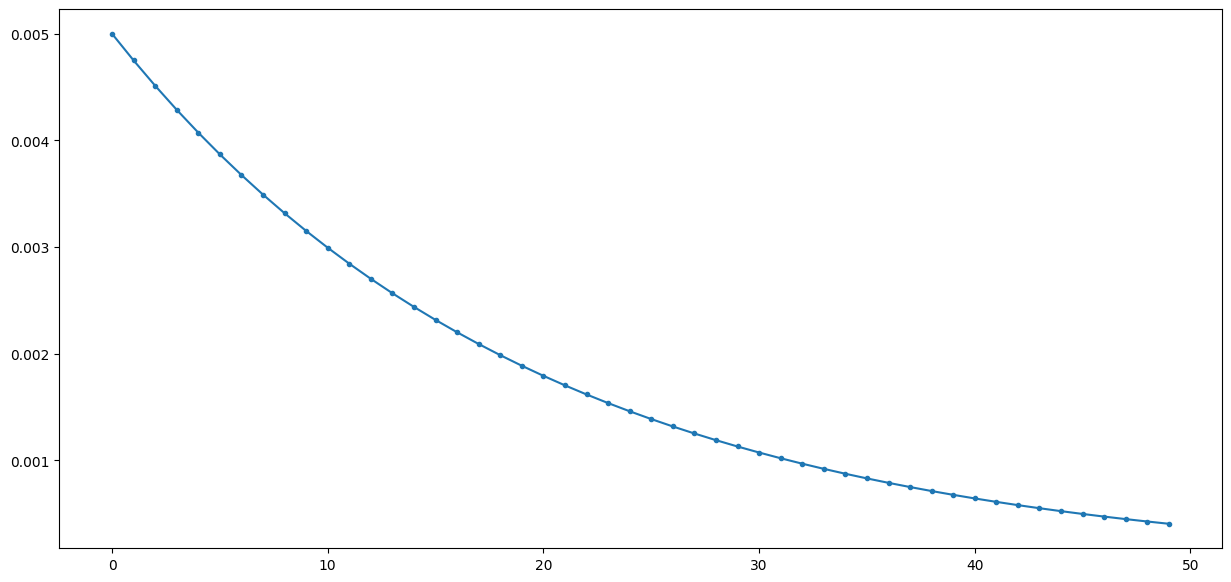

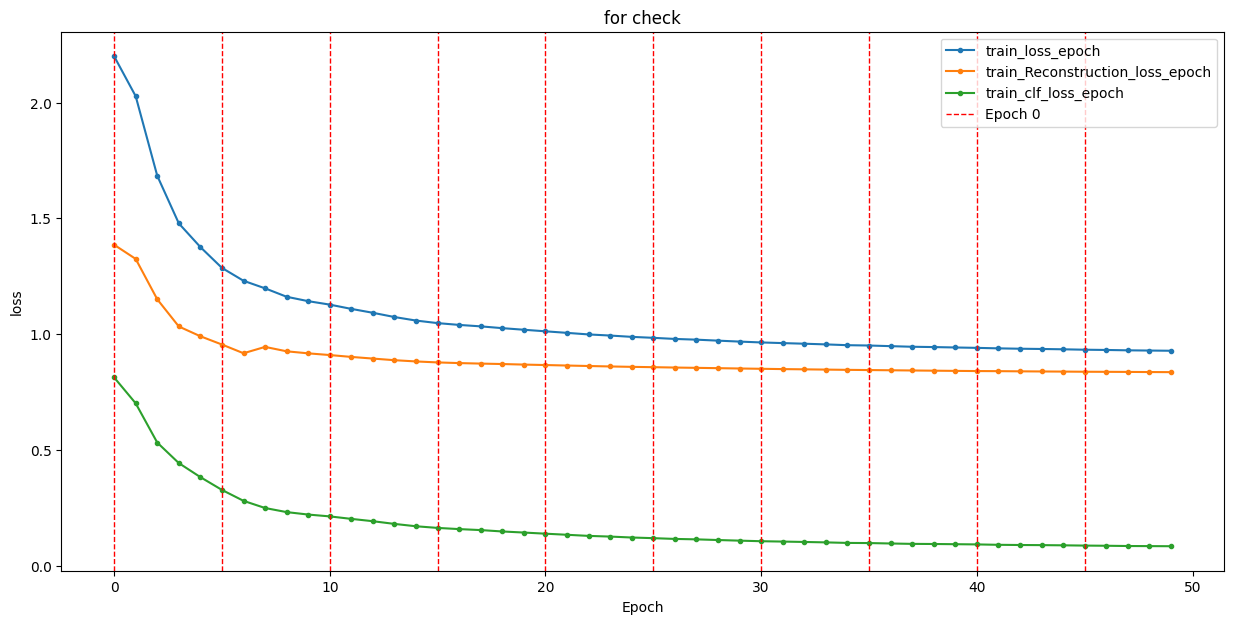

2025-07-27 23:27:07,298 INFO - TemporalVAE.utils.utils_plot - plot training process. 
2025-07-27 23:27:07,317 INFO - tensorboard - No path found after /ssd/users/yuanhua/MyGit/TemporalVAE-release/examples/data/supervise_vae_regressionclfdecoder_mouse_stereo_dim50_timeembryoneg1to1_epoch50_minGeneNum50/wholeData/SuperviseVanillaVAE_regressionClfDecoder_mouse_noAdversarial/version_5/events.out.tfevents.1753676751.woody.3048840.0 
2025-07-27 23:27:07,447 INFO - TemporalVAE.utils.utils_plot - Finish save images at: /ssd/users/yuanhua/MyGit/TemporalVAE-release/examples/data/supervise_vae_regressionclfdecoder_mouse_stereo_dim50_timeembryoneg1to1_epoch50_minGeneNum50/wholeData/SuperviseVanillaVAE_regressionClfDecoder_mouse_noAdversarial/version_5/trainingLoss_train_Reconstruction_loss_epoch_.png 


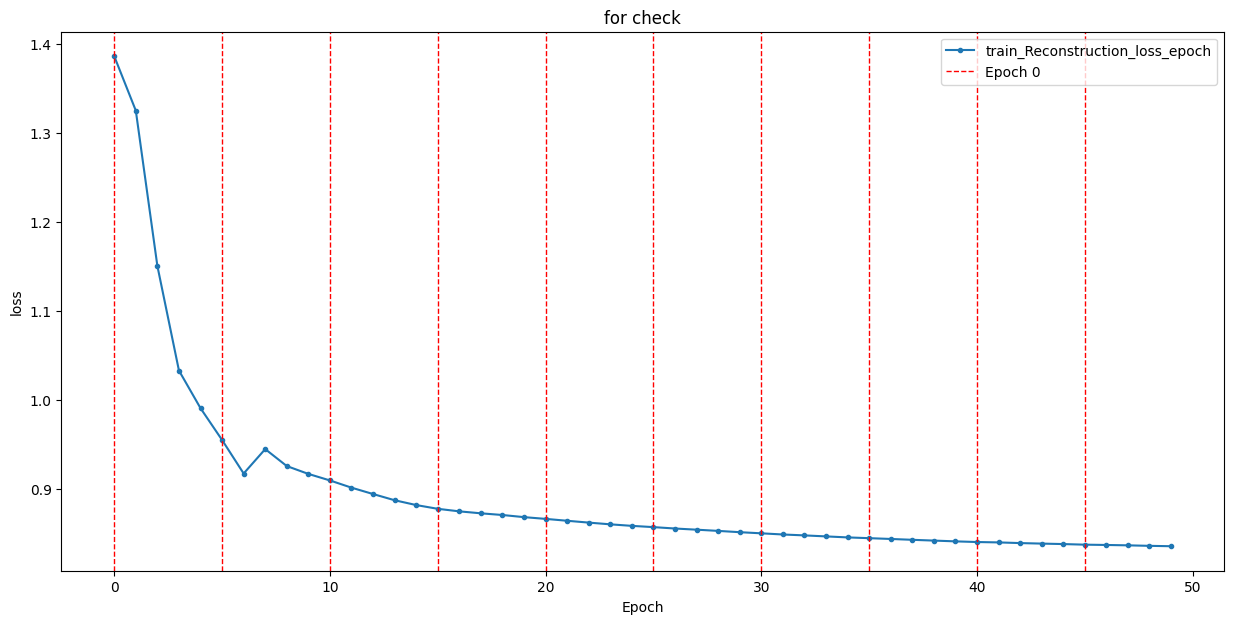

2025-07-27 23:27:07,559 INFO - TemporalVAE.utils.utils_plot - plot training process. 
2025-07-27 23:27:07,575 INFO - tensorboard - No path found after /ssd/users/yuanhua/MyGit/TemporalVAE-release/examples/data/supervise_vae_regressionclfdecoder_mouse_stereo_dim50_timeembryoneg1to1_epoch50_minGeneNum50/wholeData/SuperviseVanillaVAE_regressionClfDecoder_mouse_noAdversarial/version_5/events.out.tfevents.1753676751.woody.3048840.0 
/ssd/users/yuanhua/envs/TemporalVAE-V1.0/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/ssd/users/yuanhua/envs/TemporalVAE-V1.0/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism

<Figure size 1500x700 with 0 Axes>

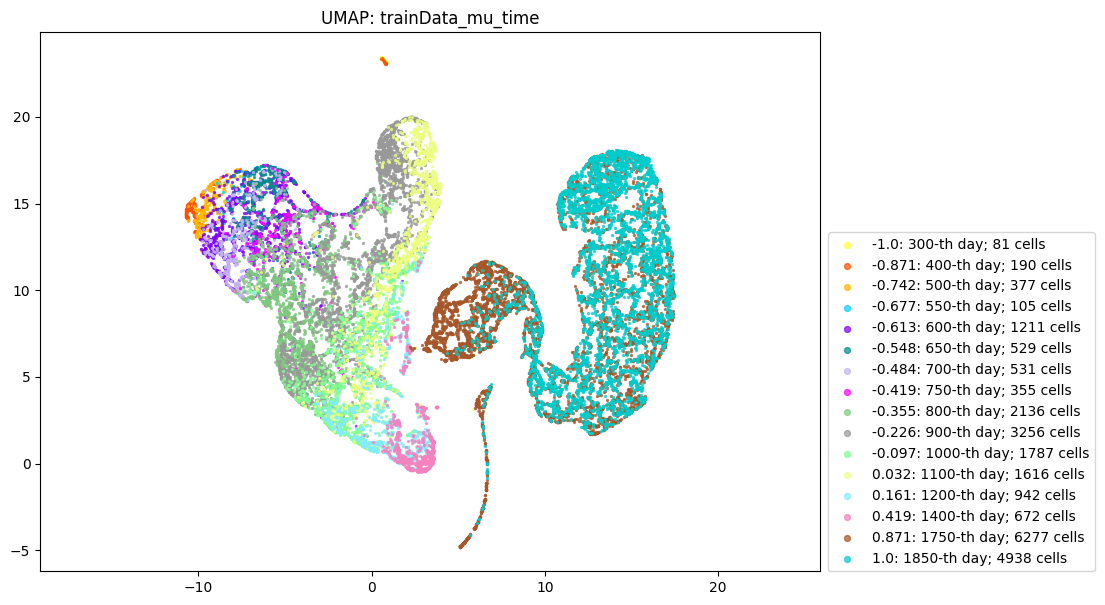

/ssd/users/yuanhua/envs/TemporalVAE-V1.0/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
2025-07-27 23:27:55,526 INFO - TemporalVAE.utils.utils_plot - Finish plot latent space umap, save images at: /ssd/users/yuanhua/MyGit/TemporalVAE-release/examples/data/supervise_vae_regressionclfdecoder_mouse_stereo_dim50_timeembryoneg1to1_epoch50_minGeneNum50/latentSpace_trainData_mu_donor 


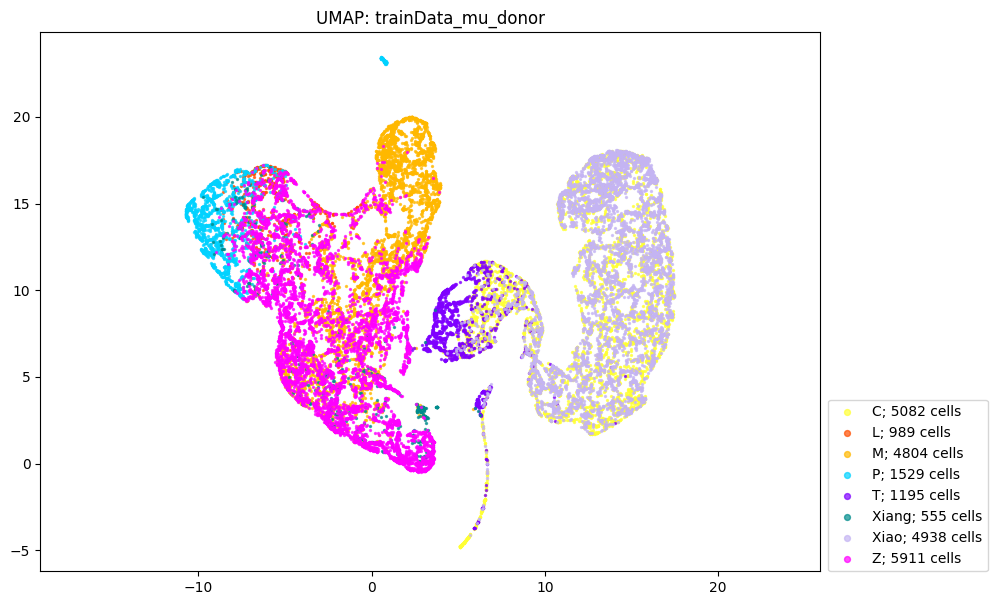

In [13]:
# random seed has already been controlled inside
# np.random.seed(1)

res = onlyTrain_model(
    sc_expression_df_use, 
    donor_dic=batch_dic,
    special_path_str="",
    cell_time=cell_time_use,
    time_standard_type="embryoneg1to1", 
    config=config, 
    train_epoch_num=50,
    plot_latentSpaceUmap=True, 
    plot_trainingLossLine=True, 
    time_saved_asFloat=True, 
    batch_dic=batch_dic, 
    donor_str="dataset_label",
    batch_size=100000
)

In [14]:
sc_expression_train, y_time_nor_train, donor_index_train, runner, experiment, \
_m, train_clf_result, label_dic, total_result = res